## S&DS 355/555: Assignment 1
### NetID: sa857

Due: Sep 17, 2019 11:59pm

In [56]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# settings
pd.set_option('display.max_columns', 999)

# Problem 1: Simple Linear Regression (25 points)

## Problem 1.a:

In class we considered linear regression with the model $$Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$$ where $\epsilon \sim N(0, \sigma^2)$ for $i = 1,2,\ldots,n$. Suppose that we believe that the true value of $\beta_0$ is zero. In this case we now consider the simpler model $Y_i = \beta_1 X_i + \epsilon_i$. Find an expression for $\beta_1$, the estimate of $\beta_1$ that minimizes the sum of squared residuals for this simpler model

Usually, $RSS = (y_1 - \hat{\beta_0} - \hat{\beta_1}x_1)^2 + (y_2 - \hat{\beta_0} - \hat{\beta_1}x_2)^2 + ... (y_n - \hat{\beta_0} - \hat{\beta_1}x_n)^2$

Now, $RSS = (y_1 - \hat{\beta_1}x_1)^2 + (y_2 - \hat{\beta_1}x_2)^2 + ... (y_n - \hat{\beta_1}x_n)^2$

$% my variables$
$\newcommand{\mySum}{\sum_{i = 1}^n}$
$\newcommand{\partialExpr}{\frac{\partial RSS}{\partial \beta_1}}$

$RSS = \mySum (y_i - \hat{\beta_1}x_i)^2$

$\partialExpr = \mySum 2(y_i - \hat{\beta_1}x_i)(-x_i) = 0$

$\mySum (y_i - \hat{\beta_1}x_i)(x_i) = 0$

$\mySum x_i y_i = \mySum \hat{\beta_1}(x_i)^2$

$\frac{\mySum x_i y_i}{\mySum (x_i)^2} = \hat{\beta_1}$


## Problem 1.b:

Download the `fatherson.csv` file on Canvas with the Jupyter notebook for this homework assignment. This dataset, collected by Galton, contains the height of sons and the height of their father.
To read it in, use the function below:

```python
x = pd.read_csv("fatherson.csv")
```

After reading in this dataset, create a scatterplot of the sons’ heights (on the $Y$-axis) versus the fathers’ heights. Use your answer from (a) to calculate the slope of the least-squares line under the model with no intercept: $$\text{Son}_i = \beta_1 \text{Father}_i + \epsilon_i$$
Add the fitted line to the scatterplot.

Beta 1: 1.0139079627134635


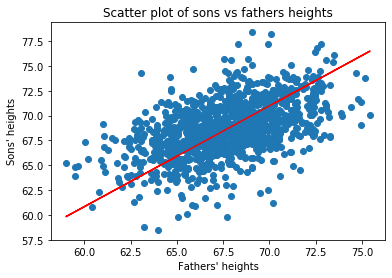

In [58]:
# read in data
fsData = pd.read_csv("fatherson.csv")

# scatter plot
plt.scatter(fsData.fheight, fsData.sheight)
plt.title("Scatter plot of sons vs fathers heights")
plt.xlabel("Fathers' heights")
plt.ylabel("Sons' heights")

# calculate beta
beta_1 = sum(fsData.fheight.values * fsData.sheight.values) / sum((fsData.fheight.values)**2)
print(f"Beta 1: {beta_1}")

# plot line
plt.plot(fsData.fheight, beta_1 * fsData.fheight, "r")


# plt.show()

## Problem 1.c:

Interpret the meaning of the coefficient $\beta_1$ in the context of Galton’s father-son dataset.

### Every unit increase in the height of a father leads to a 1.014 increase in the height of his son. 

## Problem 1.d:

Use the equations provided in class (for the least-squares coefficients of the linear regression model that includes an intercept) to calculate the least-squares estimates of the coefficients for the linear model that includes a slope and an intercept: $$\text{Son}_i = \beta_0 + \beta_1 \text{Father}_i + \epsilon_i$$

$% variables$

$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$

$\hat{\beta_1} = \frac{\mySum (x_i - \bar{x})(y_i - \bar{y})}{\mySum(x_i - \bar{x})^2}$

B1: 0.5140930386233066, B0: 33.886604354077996


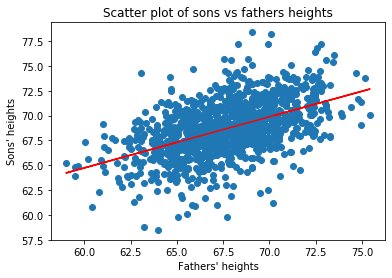

In [59]:
# calculate estimates
yBar = np.mean(fsData.sheight)
xBar = np.mean(fsData.fheight)
xSubXBar = fsData.fheight.values - xBar
ySubYBar = fsData.sheight.values - yBar
beta1 = sum(xSubXBar * ySubYBar) / sum(xSubXBar ** 2)
beta0 = yBar - (beta1 * xBar)
print(f"B1: {beta1}, B0: {beta0}")

# plot to test
plt.scatter(fsData.fheight, fsData.sheight)
plt.title("Scatter plot of sons vs fathers heights")
plt.xlabel("Fathers' heights")
plt.ylabel("Sons' heights")
plt.plot(fsData.fheight, (beta1*fsData.fheight) + beta0, "r")

# Problem 2: Linear regression and classification (30 points)

Citi Bike is a public bicycle sharing system in New York City. There are hundreds of bike stations scattered throughout the city. Customers can check out a bike at any station and return it at any other station. Citi Bike caters to both commuters and tourists. Details on this program can be found at https://www.citibikenyc.com/

For this problem, you will build models to predict Citi Bike usage, in number of trips per day.
The dataset consists of Citi Bike usage information and weather data recorded from Central Park. 

In the `citibike_*.csv` files, we see:

1. date

2. trips: the total number of Citi Bike trips. This is the outcome variable.

3. n_stations: the total number of Citi Bike stations in service

4. holiday: whether or not the day is a work holiday

5. month: taken from the date variable

6. dayofweek: taken from the date variable

In the `weather.csv` file, we have:

1. date

2. PRCP: amount precipitation (i.e. rainfall amount) in inches 

3. SNWD: snow depth in inches

4. SNOW: snowfall in inches

5. TMAX: maximum temperature for the day, in degrees F

6. TMIN: minimum temperature for the day, in degrees F

7. AWND: average windspeed

You are provided a training set consisting of data from 7/1/2013 to 3/31/2016, and a test set consisting of data after 4/1/2016. The weather file contains weather data for the entire year. 

## Problem 2.a: Read in and merge the data.

To read in the data, you can run, for example:
```python
train = pd.read_csv("citibike_train.csv")
test = pd.read_csv("citibike_test.csv")
```

Merge the training and test data with the weather data, by date. Once you have successfully merged the data, you may drop the "date" variable; we will not need it for the rest of this assignment.

In [60]:
train = pd.read_csv("citibike_train.csv")
test = pd.read_csv("citibike_test.csv")
weather = pd.read_csv("weather.csv")

In [61]:
# merge the weather by "date", and then drop "date" column
train = train.merge(weather, left_on="date", right_on="date").drop(columns=["date"])
test = test.merge(weather, left_on="date", right_on="date").drop(columns=["date"])

*For the rest of this problem, you will train your models on the training data and evaluate them on the test data.*

As always, before you start any modeling, you should look at the data. Make scatterplots of some of the numeric variables. Look for outliers and strange values. Comment on any steps you take to remove entries or otherwise process the data. Also comment on whether any predictors are strongly correlated with each other. 

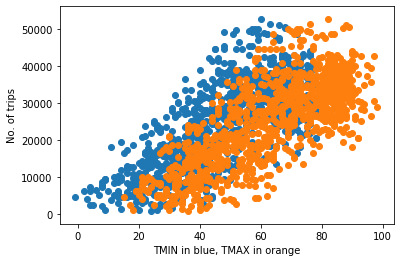

In [62]:
# make scatterplots
plt.scatter(train.TMIN, train.trips)
plt.scatter(train.TMAX, train.trips)
plt.xlabel("TMIN in blue, TMAX in orange")
plt.ylabel("No. of trips")
plt.show()

TMAX and TMIN are strongly correlated with each other. As temperatures rise, the number of train trips increase. TMAX and TMIN are just cutoffs for the same temperature rise phenomenon.



## Problem 2.b: Linear regression

Fit a linear regression model to predict the number of trips. Include all the covariates in the data. You may import the `statsmodels.api` module to get a R-like statistical output. You may write code as:

```python
import statsmodels.api as sm
X = sm.add_constant(X) # to get the intercept term
model = sm.OLS(y,X).fit()
model.summary()
```

Next, find the "best" linear model that uses only $p$ variables,
for each $p=1,2,3,4,5$.  It is up to you to choose how to select the "best" subset of variables. 
(A categorical variable or factor such as "month" corresponds to a single variable.) Describe how you selected 
each model. Give the $R^2$ and the mean squared error (MSE) on the training and test set for each of the models. 
Which model gives the best fit to the data? Comment on your findings.


In [63]:
# PROCESSING

# if statement to run the conversion once only
if 'holiday' in train.columns:
    train['holiday'] = train['holiday'].astype('category')
    test['holiday'] = test['holiday'].astype('category')
    
# put dummies
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# see if test is missing columns
one = set(test.columns.values)
two = set(train.columns.values)
missing_columns = list(two.difference(one))

# fill in columns of zeros to get train and test to be same shape
for col in missing_columns:
    test[col] = 0

In [ ]:
train
test

In [68]:
# sort to be the same column order
test = test.reindex(sorted(test.columns), axis=1)
train = train.reindex(sorted(train.columns), axis=1)

In [80]:
# fit a linear regression model using all covariates
import statsmodels.api as sm
covariates = train.drop(columns="trips")
X = sm.add_constant(covariates)
y = train[["trips"]]
model = sm.OLS(y, X)
result = model.fit()


# import statsmodels.formula.api as smf
# predictor_columns =  " + ".join(train.drop(columns="trips").columns.values)
# formula = "trips ~ " + predictor_columns
# model2=smf.ols(data=train, formula=formula).fit()
# print(model2.summary())

print(result.summary())


print(f"\n\nMSE: {result.mse_resid}")


                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     268.5
Date:                Fri, 13 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:31:56   Log-Likelihood:                -9747.3
No. Observations:                1001   AIC:                         1.955e+04
Df Residuals:                     975   BIC:                         1.967e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.255e+04    754.560    -

In [71]:
# predict using model
predictions = model.predict(test)
print(predictions)
print(test.trips)

0      4.494824e+06
1      3.688157e+06
2      4.309359e+06
3      3.755125e+06
4      4.713549e+06
           ...     
178    5.682508e+06
179    6.168992e+06
180    6.760928e+06
181    6.877307e+06
182    6.550511e+06
Length: 183, dtype: float64
0      34449
1      23229
2      32048
3      23765
4      37539
       ...  
178    45436
179    52447
180    60500
181    61596
182    56813
Name: trips, Length: 183, dtype: int64


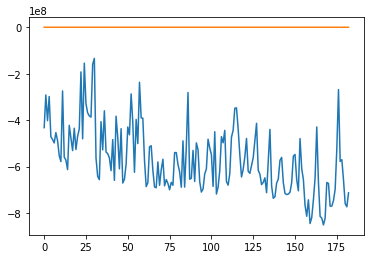

In [66]:
plt.plot(range(0, 183), predictions)
plt.plot(range(0, 183), test.trips)


## Problem 2.c: KNN Classification

Now we will transform the outcome variable to allow us to do classification. Create a new vector $Y$ with entries:
$$
Y[i] = \mathbf{1} \{ trips[i] > median(trips) \}
$$

Use the median of the variable from the full data (training and test combined). After computing
the binary outcome variable $Y$, you should drop the original trips variable from the data.

In [116]:
## -- please write your answer here. -- ## 

Recall that in $k$-nearest neighbors classification, the predicted value $\hat Y$ of $X$ is 
the majority vote of the labels for the $k$ nearest neighbors $X_i$ to $X$. We will use the Euclidean distance as our measure of distance between points. Note that the Euclidean distance doesn't make much sense for factor variables, so just drop the predictors that are categorical for this problem. Standardize the numeric predictors so that they have mean zero and constant standard deviation.

In [117]:
## -- please write your answer here. -- ## 

You may use the ```KNeighborsClassifier``` function from the ```sklearn.neighbors``` module to perform $k$-nearest neighbor classification, using as the neighbors the labeled points in the training set. Fit a classifier for $k = 1:50$, and find the mis-classification rate on both the training and test sets for each $k$. On a single plot, show the training set error and the test set error as a function of $k$. How would you choose the optimal $k$? Comment on your findings, and in particular on the possibility of overfitting.

In [118]:
## -- please write your answer here. -- ## 

# Problem 3: Classification for a Gaussian Mixture (25 points)

A Gaussian mixture model is a random combination of multiple Gaussians. Specifically, we can generate $n$ data points from such a distribution in the following way. First generate labels $Y_1, \cdots, Y_n$ according to 
$$
Y_i =
\left\{
	\begin{array}{ll}
		0  & \mbox{with probability } 1/2 \\
		 1 & \mbox{with probability } 1/2.
	\end{array}
\right.
$$
Then, generate the data $X_1, \cdots, X_n$ according to
$$
X_i \sim
\left\{
	\begin{array}{ll}
		N(\mu_0, \sigma_0^2)  & \mbox{if } Y_i = 0 \\
		N(\mu_1, \sigma_1^2) & \mbox{if } Y_i = 1.
	\end{array}
\right.
$$
Given such data $\{X_i\}$, we may wish to recover the true labels $Y_i$, which is a classification task.

## Problem 3.a.

Suppose the parameters of the above model are: $\mu_0 = 0, \mu_1 = 3, \sigma_0^2 = \sigma_1^2 = 1$. Then the Bayes classifier is given by
$$
f(X) = I\{X > 1.5 \},
$$
where $I$ is the indicator function (take note of the 1.5, and it's relation with the means of the two Normal distributions).

Now generate $n = 2000$ data points from this dataset. Plot a histogram of the $X$'s. This histogram is meant to be a sanity check for you; it should help you verify that you've generated the data properly. 

In [119]:
## -- please write your answer here. -- ## 

Set aside a randomly-selected test set of $n/5$ points. We will refer to the rest of the data as the training data. Use the labels of the training data to calculate the group means. That is, calculate the mean value of all the $X_i$'s in the training data with label $Y_i = 0$. Call this sample mean $\hat \mu_0$. Do the same thing to find $\hat \mu_1$. To be explicit, let $C_j = \{ i : Y_i = j \}$, and define
$$
\hat \mu_j = \frac{1}{|C_j|} \sum_{i \in C_j} X_i
$$
Now classify the data in your test set. To do this, recall that your rule in Part a. depended on the true data means $\mu_0 = 0$ and $\mu_1 = 3$. Plug in the sample means $\hat \mu_j$ instead. Evaluate the estimator's performance using the loss: 
$$
\frac{1}{n} \sum_{i = 1}^n 1\{ \hat Y_i \ne Y_i \}
$$

In [120]:
## -- please write your answer here. -- ## 

## Problem 3.b.

Now you train and evaluate classifiers for training sets of increasing size $n$, as specified below. For each $n$, you should

1. Generate a training set of size $n$ from the above model (with the same parameters).
2. Generate a test set of size 10,000. Note that the test set itself will change on each round, but the size will always be the same: 10,000.
3. Compute the sample means on the training data.
4. Classify the test data as described in Part c.
5. Compute the error rate.

Plot the error rate as a function of $n$. Comment on your findings. What is happening to the error rate as $n$ grows?

In [121]:
## -- please write your answer here. -- ## 
seq_n = np.arange(start = 2000, stop = 20000, step = 20)